#### importing all neccessary lib and read the data file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st #skew,kurtosis,iqr
import seaborn as sns # boxplot
df=pd.read_csv('food-consumption.csv')
df

,Country,Real_coffee,Instant_coffee,Tea,Sweetener,Biscuits,Powder_soup,Tin_soup,Potatoes,Frozen_fish,...,Apples,Oranges,Tinned_fruit,Jam,Garlic,Butter,Margarine,Olive_oil,Yoghurt,Crisp_bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,...,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,...,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,...,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,...,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,...,76,76,42,57,29,84,80,83,20.0,5
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,...,85,94,83,20,91,94,94,84,31.0,24
6,England,27,86,99,22.0,91.0,55,76,17,20,...,76,68,89,91,11,95,94,57,11.0,28
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,...,22,51,8,16,89,65,78,92,6.0,9
8,Austria,55,31,61,15.0,29.0,33,1,5,15,...,49,42,14,41,51,51,72,28,13.0,11
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,...,79,70,46,61,64,82,48,61,48.0,30


#### getting info about data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 21 columns):
Country           16 non-null object
Real_coffee       16 non-null int64
Instant_coffee    16 non-null int64
Tea               16 non-null int64
Sweetener         15 non-null float64
Biscuits          15 non-null float64
Powder_soup       16 non-null int64
Tin_soup          16 non-null int64
Potatoes          16 non-null int64
Frozen_fish       16 non-null int64
Frozen_veggies    16 non-null int64
Apples            16 non-null int64
Oranges           16 non-null int64
Tinned_fruit      16 non-null int64
Jam               16 non-null int64
Garlic            16 non-null int64
Butter            16 non-null int64
Margarine         16 non-null int64
Olive_oil         16 non-null int64
Yoghurt           15 non-null float64
Crisp_bread       16 non-null int64
dtypes: float64(3), int64(17), object(1)
memory usage: 2.7+ KB


#### checking whether any null value is there or not with each column

In [26]:
df.isnull().sum()

Country           0
Real_coffee       0
Instant_coffee    0
Tea               0
Sweetener         1
Biscuits          1
Powder_soup       0
Tin_soup          0
Potatoes          0
Frozen_fish       0
Frozen_veggies    0
Apples            0
Oranges           0
Tinned_fruit      0
Jam               0
Garlic            0
Butter            0
Margarine         0
Olive_oil         0
Yoghurt           1
Crisp_bread       0
dtype: int64

### replacing all the null value with 'ffill' for further operation

In [27]:
df['Sweetener'].fillna(method='ffill',inplace=True)

In [28]:
df['Biscuits'].fillna(method='ffill',inplace=True)

In [29]:
df['Yoghurt'].fillna(method='ffill',inplace=True)

In [30]:
df.isnull().sum()

Country           0
Real_coffee       0
Instant_coffee    0
Tea               0
Sweetener         0
Biscuits          0
Powder_soup       0
Tin_soup          0
Potatoes          0
Frozen_fish       0
Frozen_veggies    0
Apples            0
Oranges           0
Tinned_fruit      0
Jam               0
Garlic            0
Butter            0
Margarine         0
Olive_oil         0
Yoghurt           0
Crisp_bread       0
dtype: int64

### describe the data which as numeric data

In [3]:
li=['Real_coffee','Instant_coffee','Tea','Sweetener','Biscuits','Powder_soup','Tin_soup','Potatoes','Frozen_fish','Frozen_veggies','Apples','Oranges','Tinned_fruit','Jam','Garlic','Butter','Margarine','Olive_oi','Yoghurt','Crisp_bread']
for i in li:
    print(st.iqr(df[i]))

24.5
37.25
29.75
nan
nan
21.75
16.25
10.5
12.5
15.0
24.25
12.0
22.75
31.75
70.5
29.5
46.25


C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


KeyError: 'Olive_oi'

In [36]:
df.describe()

,Real_coffee,Instant_coffee,Tea,Sweetener,Biscuits,Powder_soup,Tin_soup,Potatoes,Frozen_fish,Frozen_veggies,Apples,Oranges,Tinned_fruit,Jam,Garlic,Butter,Margarine,Olive_oil,Yoghurt,Crisp_bread
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,78.562500,39.250000,78.500000,18.125000,58.812500,49.000000,18.312500,12.750000,21.875000,15.87500,66.812500,70.500000,41.937500,55.187500,42.312500,75.812500,69.125000,54.187500,19.375000,27.750000
std,23.145824,23.147354,18.540047,10.544351,20.553082,15.427249,20.178268,9.574271,13.980343,12.78997,17.581122,14.033294,23.256451,22.592679,34.677022,20.910026,26.849891,28.842604,18.913399,25.026652
min,27.000000,10.000000,40.000000,2.000000,22.000000,27.000000,1.000000,2.000000,4.000000,2.00000,22.000000,42.000000,8.000000,16.000000,5.000000,31.000000,24.000000,13.000000,2.000000,3.000000
25%,71.500000,17.000000,62.500000,11.000000,49.000000,36.250000,3.750000,6.500000,13.750000,6.50000,56.750000,65.250000,28.000000,40.250000,11.000000,64.500000,47.750000,29.500000,4.500000,10.500000
50%,89.000000,39.000000,84.500000,19.500000,62.000000,47.000000,11.500000,10.000000,19.500000,13.00000,71.500000,72.000000,43.000000,54.000000,25.500000,83.000000,79.000000,52.500000,12.000000,21.000000
75%,96.000000,54.250000,92.250000,25.750000,74.500000,58.000000,20.000000,17.000000,26.250000,21.50000,81.000000,77.250000,50.750000,72.000000,81.500000,94.000000,94.000000,83.250000,30.250000,31.000000
max,98.000000,86.000000,99.000000,35.000000,91.000000,75.000000,76.000000,39.000000,54.000000,45.00000,87.000000,94.000000,89.000000,91.000000,91.000000,97.000000,97.000000,94.000000,57.000000,93.000000


### checking the skewness of the data

### skewness of all sample as within the range of -1.96 to +1.96 so it is normally distributed data

In [33]:
st.skew(df.Real_coffee)

-1.2594244967685218

In [37]:
st.skew(df.Instant_coffee)

0.4114743147373834

In [38]:
st.skew(df.Tea)

-0.7443195415576758

In [39]:
st.skew(df.Sweetener)

-0.06586256524705199

In [40]:
st.skew(df.Biscuits)

-0.4694658968249821

In [41]:
st.skew(df.Powder_soup)

0.37174827005430705

In [42]:
st.skew(df.Tin_soup)

1.668871678179868

In [43]:
st.skew(df.Potatoes)

1.2550414312443015

In [44]:
st.skew(df.Frozen_fish)


1.1387430690766995

In [45]:
st.skew(df.Frozen_veggies)

1.1322069808470574

In [46]:
st.skew(df.Apples)

-0.959373380070362

In [47]:
st.skew(df.Oranges)

-0.41459463270054997

In [48]:
st.skew(df.Tinned_fruit)

0.4141633303739599

In [49]:
st.skew(df.Jam)

-0.031034428465910365

In [50]:
st.skew(df.Garlic)

0.3761489617201711

In [51]:
st.skew(df.Butter)

-0.7296581296234627

In [52]:
st.skew(df.Margarine)

-0.5530400625909548

In [53]:
st.skew(df.Olive_oil)

0.10186975472320046

In [54]:
st.skew(df.Yoghurt)

0.9214617538868429

In [55]:
st.skew(df.Crisp_bread)

1.3827181793936045

In [34]:
df.skew()

Real_coffee      -1.393637
Instant_coffee    0.455324
Tea              -0.823639
Sweetener        -0.072881
Biscuits         -0.519495
Powder_soup       0.411364
Tin_soup          1.846718
Potatoes          1.388787
Frozen_fish       1.260095
Frozen_veggies    1.252863
Apples           -1.061611
Oranges          -0.458777
Tinned_fruit      0.458299
Jam              -0.034342
Garlic            0.416234
Butter           -0.807415
Margarine        -0.611976
Olive_oil         0.112726
Yoghurt           1.019659
Crisp_bread       1.530070
dtype: float64

### kurtosis of all sample as within the range of -1.96 to +1.96 so it is normally distributed data

In [56]:
st.kurtosis(df.Real_coffee)

0.37463386969347834

In [57]:
st.kurtosis(df.Instant_coffee)

-0.8355479646834958

In [58]:
st.kurtosis(df.Tea)

-0.6402771918019692

In [59]:
st.kurtosis(df.Sweetener)

-1.0522639073389586

In [60]:
st.kurtosis(df.Biscuits)

-0.8447134822620637

In [61]:
st.kurtosis(df.Powder_soup)

-1.0959612080126169

In [62]:
st.kurtosis(df.Tin_soup)

2.2242884356353487

In [63]:
st.kurtosis(df.Potatoes)

1.4707824132231408

In [64]:
st.kurtosis(df.Frozen_fish)

0.7225067392412483

In [65]:
st.kurtosis(df.Frozen_veggies)

0.4712376520390338

In [66]:
st.kurtosis(df.Apples)

0.5001629333739999

In [67]:
st.kurtosis(df.Oranges)

-0.403025125955236

In [68]:
st.kurtosis(df.Tinned_fruit)

-0.27850353297672603

In [69]:
st.kurtosis(df.Jam)

-0.8802376822578193

In [70]:
st.kurtosis(df.Garlic)

-1.6238660646717644

In [71]:
st.kurtosis(df.Butter)

-0.641878266885016

In [72]:
st.kurtosis(df.Margarine)

-1.244315615430351

In [73]:
st.kurtosis(df.Olive_oil)

-1.509903243835392

In [74]:
st.kurtosis(df.Yoghurt)

-0.5456833513716046

In [75]:
st.kurtosis(df.Crisp_bread)

1.039287608114221

In [35]:
df.kurtosis()

Real_coffee       1.019405
Instant_coffee   -0.676180
Tea              -0.402586
Sweetener        -0.979820
Biscuits         -0.689022
Powder_soup      -1.041045
Tin_soup          3.610954
Potatoes          2.555217
Frozen_fish       1.506809
Frozen_veggies    1.154756
Apples            1.195283
Oranges          -0.070173
Tinned_fruit      0.104295
Jam              -0.738795
Garlic           -1.780691
Butter           -0.404829
Margarine        -1.248904
Olive_oil        -1.621018
Yoghurt          -0.270051
Crisp_bread       1.950650
dtype: float64

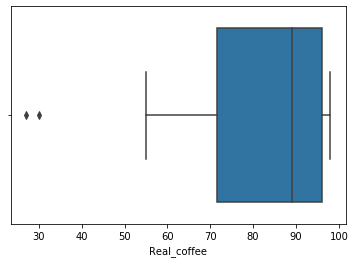

In [76]:
sns.boxplot(df.Real_coffee)

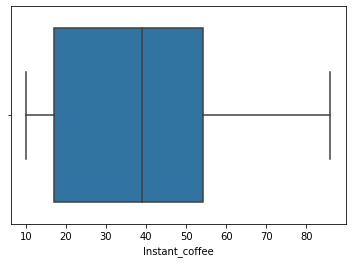

In [77]:
sns.boxplot(df.Instant_coffee)

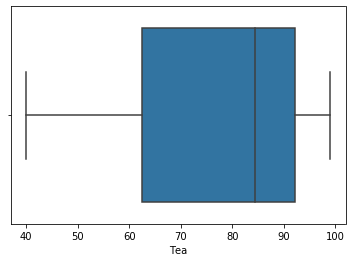

In [80]:
sns.boxplot(df.Tea)

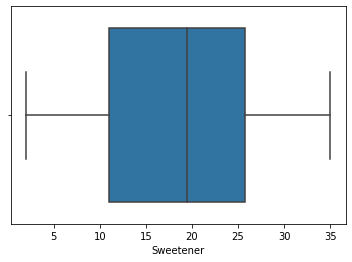

In [81]:
sns.boxplot(df.Sweetener)


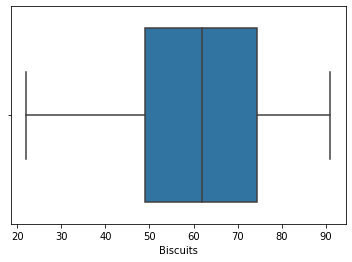

In [83]:
sns.boxplot(df.Biscuits)

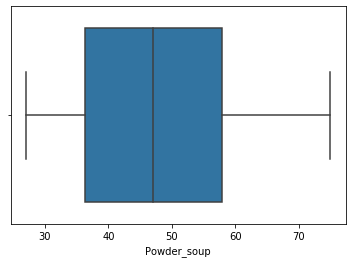

In [84]:
sns.boxplot(df.Powder_soup)

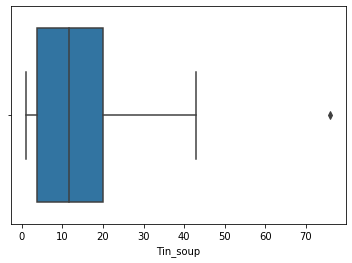

In [85]:
sns.boxplot(df.Tin_soup)

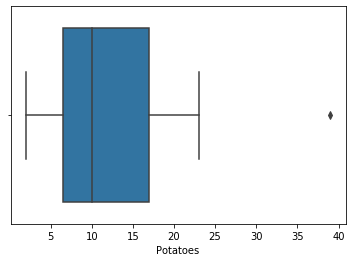

In [86]:
sns.boxplot(df.Potatoes)

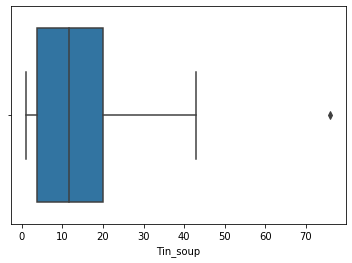

In [87]:
sns.boxplot(df.Tin_soup)

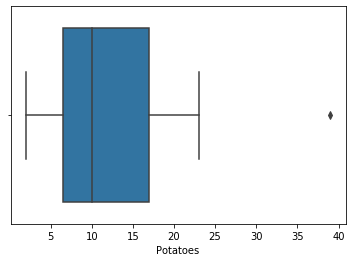

In [89]:
sns.boxplot(df.Potatoes)

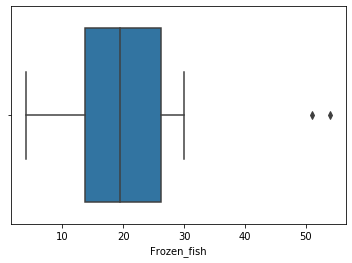

In [90]:
sns.boxplot(df.Frozen_fish)

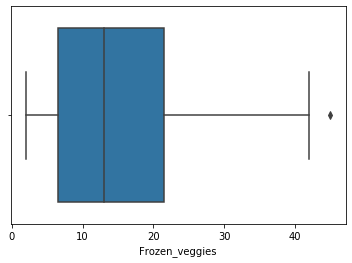

In [91]:
sns.boxplot(df.Frozen_veggies)

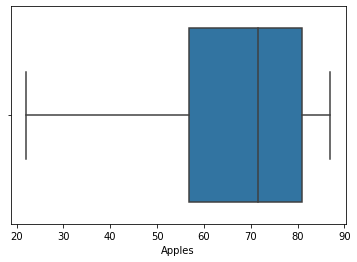

In [92]:
sns.boxplot(df.Apples)

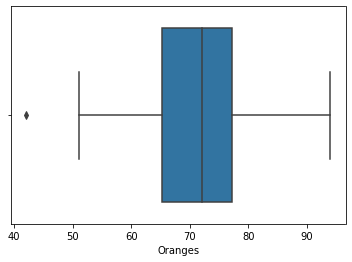

In [93]:
sns.boxplot(df.Oranges)

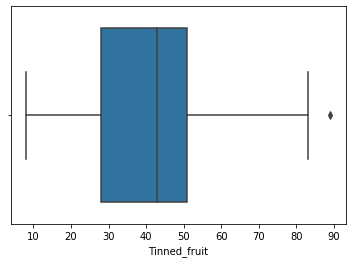

In [94]:
sns.boxplot(df.Tinned_fruit)

In [ ]:
sns.boxplot(df.Tin_soup)

In [ ]:
sns.boxplot(df.Tin_soup)

In [ ]:
sns.boxplot(df.Tin_soup)

In [ ]:
sns.boxplot(df.Tin_soup)

In [ ]:
sns.boxplot(df.Tin_soup)

In [ ]:
sns.boxplot(df.Tin_soup)

In [ ]:
sns.boxplot(df.Tin_soup)

In [ ]:
sns.boxplot(df.Tin_soup)

In [ ]:
sns.boxplot(df.Tin_soup)

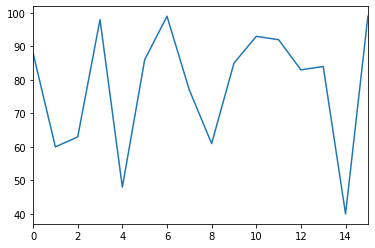

In [2]:
df.Tea.plot()

In [9]:
df['Tea'].sort()

AttributeError: 'Series' object has no attribute 'sort'

In [10]:
df.Tea.sort_values()

14    40
4     48
1     60
8     61
2     63
7     77
12    83
13    84
9     85
5     86
0     88
11    92
10    93
3     98
6     99
15    99
Name: Tea, dtype: int64

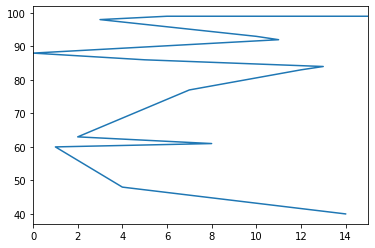

In [11]:
df.Tea.sort_values().plot()

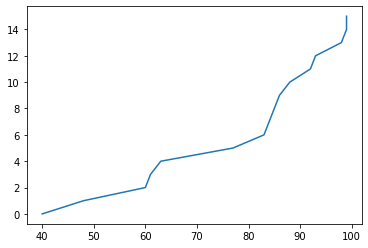

In [23]:
x=df.Tea.sort_values()
y=np.arange(0,16)
plt.plot(x,y)

In [ ]:
def fn1(x):
    for i in x:
        if(x(i)==x(i+1)):
            c=c+1
    

In [ ]:
fn1(df['Tea'].tolist())

In [18]:
df['Tea'].value_counts()

99    2
63    1
93    1
92    1
88    1
86    1
85    1
84    1
83    1
48    1
77    1
61    1
60    1
40    1
98    1
Name: Tea, dtype: int64

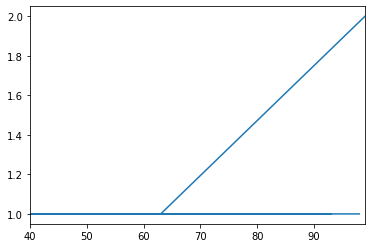

In [20]:
df['Tea'].value_counts().plot()

In [19]:
df['Tea'].tolist()

[88, 60, 63, 98, 48, 86, 99, 77, 61, 85, 93, 92, 83, 84, 40, 99]

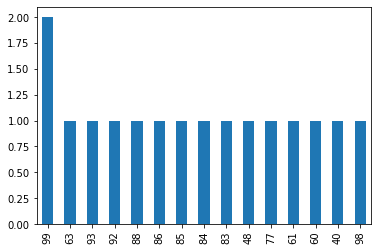

In [27]:
df['Tea'].value_counts().plot(kind='bar')